# Regression Analysis PSKY Vs the Market (SNP500)

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt 
import scipy.stats as stats

## The Market Factor (Single Factor) Model

In [3]:
df = yf.download(["PSKY", "^SP500TR"], start="2010-01-01", end="2025-12-31")

[*********************100%***********************]  2 of 2 completed


In [4]:
df

Price           Close                     High                      Low  \
Ticker           PSKY      ^SP500TR       PSKY      ^SP500TR       PSKY   
Date                                                                      
2010-01-04  10.735096   1867.060059  10.848097   1867.060059  10.531694   
2010-01-05  10.682360   1872.900024  10.833028   1873.050049  10.584425   
2010-01-06  10.343357   1874.729980  10.727561   1877.219971  10.298157   
2010-01-07  10.546759   1882.339966  10.735094   1883.410034  10.237889   
2010-01-08  10.659762   1887.770020  10.885765   1888.410034  10.456361   
...               ...           ...        ...           ...        ...   
2025-12-23  13.530000  15360.179688  13.640000  15362.549805  13.440000   
2025-12-24  13.740000  15409.700195  13.750000  15421.400391  13.360000   
2025-12-26  13.590000  15406.480469  13.740000  15441.400391  13.460000   
2025-12-29  13.500000  15353.160156  13.560000  15384.910156  13.420000   
2025-12-30  13.510000  15332.070312  13.690000  15369.669922  13.400000   

Price                          Open                  Volume           
Ticker          ^SP500TR       PSKY      ^SP500TR      PSKY ^SP500TR  
Date                                                                  
2010-01-04   1867.060059  10.704962   1867.060059   6710900        0  
2010-01-05   1861.699951  10.682360   1866.930054   5441000        0  
2010-01-06   1868.489990  10.554293   1872.380005  14566200        0  
2010-01-07   1865.040039  10.381024   1874.170044   9000300        0  
2010-01-08   1873.280029  10.539228   1881.380005   6732900        0  
...                  ...        ...           ...       ...      ...  
2025-12-23  15272.349609  13.490000  15277.080078   4407500        0  
2025-12-24  15349.379883  13.490000  15349.379883   2464100        0  
2025-12-26  15388.030273  13.700000  15420.009766   2886800        0  
2025-12-29  15315.980469  13.500000  15348.389648   4764400        0  
2025-12-30  15326.169922  13.400000  15341.410156   3937200        0  

[4023 rows x 10 columns]

In [5]:
df = df["Close"]

In [6]:
df

Ticker,PSKY,^SP500TR
Date,,
2010-01-04,10.735096,1867.060059
2010-01-05,10.682360,1872.900024
2010-01-06,10.343357,1874.729980
2010-01-07,10.546759,1882.339966
2010-01-08,10.659762,1887.770020
...,...,...
2025-12-23,13.530000,15360.179688
2025-12-24,13.740000,15409.700195
2025-12-26,13.590000,15406.480469


In [7]:
ret = df.pct_change().dropna()

In [8]:
ret

Ticker,PSKY,^SP500TR
Date,,
2010-01-05,-0.004913,0.003128
2010-01-06,-0.031735,0.000977
2010-01-07,0.019665,0.004059
2010-01-08,0.010715,0.002885
2010-01-11,-0.004240,0.001743
...,...,...
2025-12-23,-0.005878,0.004554
2025-12-24,0.015521,0.003224
2025-12-26,-0.010917,-0.000209


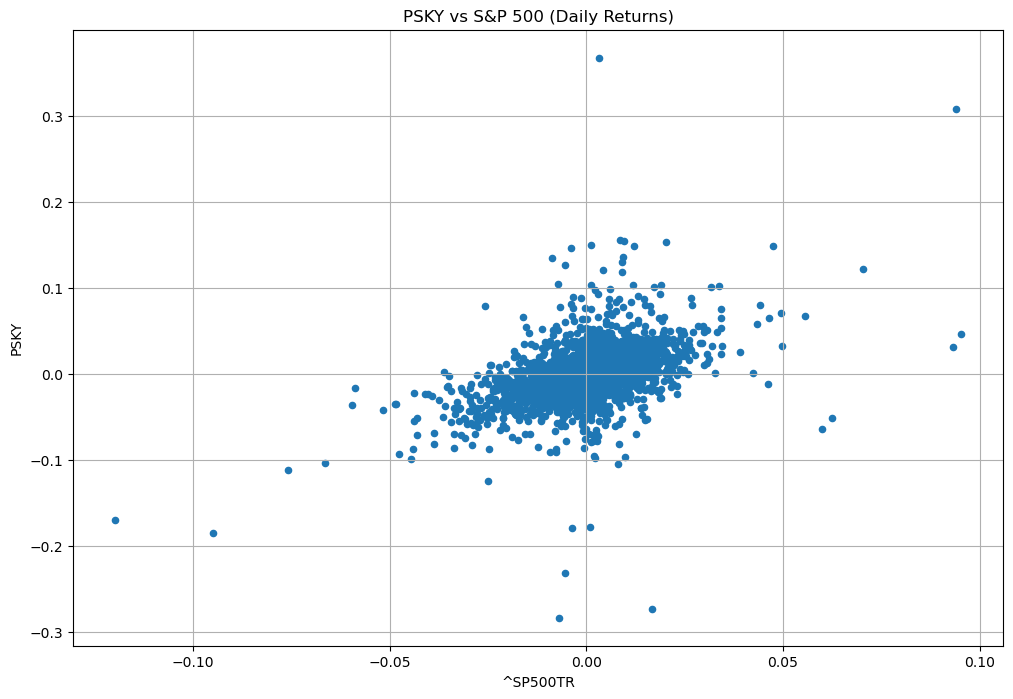

In [10]:
ret.plot(x='^SP500TR', y='PSKY', kind='scatter', title='PSKY vs S&P 500 (Daily Returns)', figsize=(12,8))
plt.grid()
plt.show()

In [11]:
# correlation coefficient between PSKY and S&P 500
corr_coef_r, p_value = stats.pearsonr(ret['^SP500TR'], ret['PSKY'])
print(f'Correlation Coefficient: {corr_coef_r}, P-value: {p_value}')

Correlation Coefficient: 0.4731058949662029, P-value: 1.7324283924198304e-223


p-value is almost zero: reject the null-hypothesis that the correlation oeffecient = 0

PSKY(sub-i) = a + beta * SP500(sub-i) + e(sub-i)<br>
Beta factor measures the increase in PSKY stock returns, when market returns increases by 1 unit <br>
Beta > 1 means that the stock over-reacts to the market, therefore, a hightly cyclical stock

In [12]:
bets, intercept, r_value, p_value, std_err = stats.linregress(x = ret['^SP500TR'], y = ret['PSKY'])
print(f'Beta: {bets}, Intercept: {intercept}, R-squared: {r_value**2}, P-value: {p_value}, Std Err: {std_err}')

Beta: 1.1762935146423317, Intercept: -0.00026037139160337616, R-squared: 0.22382918785177167, P-value: 1.7324283924202447e-223, Std Err: 0.034548004711055263


Text(0.5, 50.000000000000014, 'S&P 500 Daily Returns')

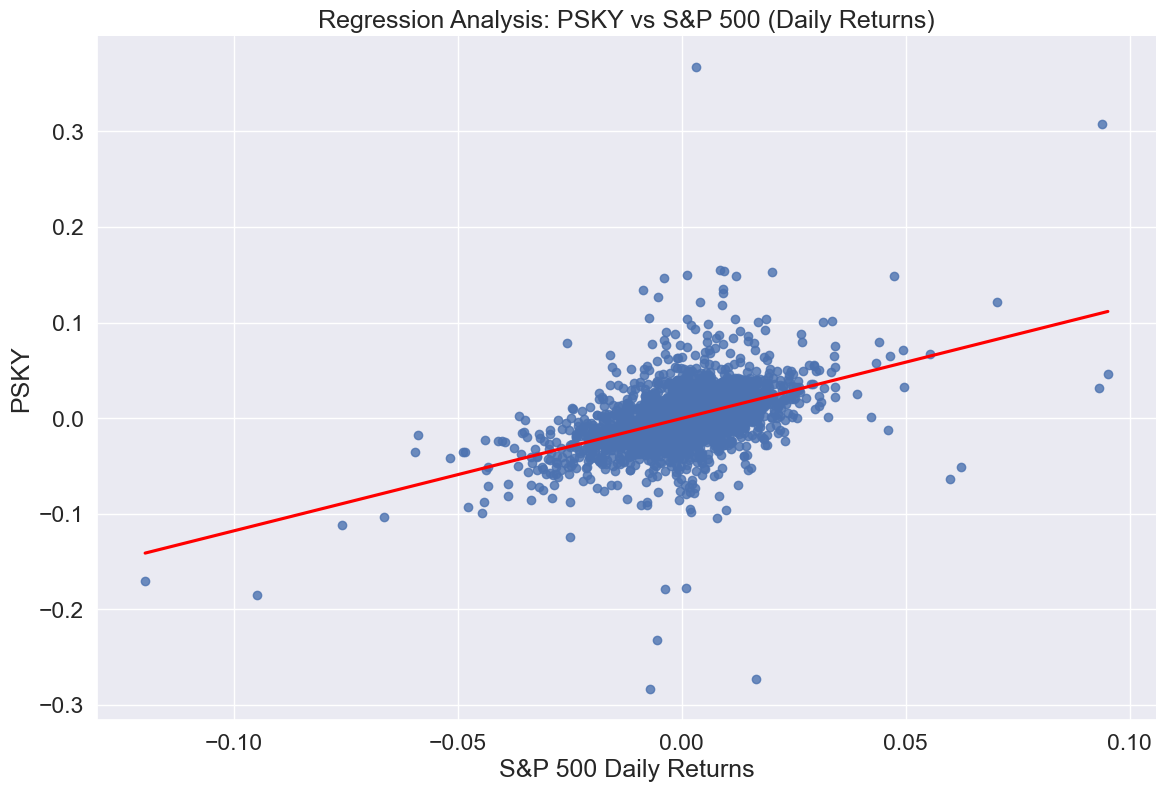

In [13]:
# visualizing the regression model
sns.set(font_scale=1.5)
sns.lmplot(x='^SP500TR', y='PSKY', data=ret, height=8, aspect=1.5, line_kws={'color': 'red'}, ci=None)
plt.title('Regression Analysis: PSKY vs S&P 500 (Daily Returns)')
plt.xlabel('S&P 500 Daily Returns')

# T-Test
To verify if the SNP500 returns explain the returns of the PSKY stock with statistical significance

In [21]:
import pandas as pd
import numpy as np
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt 
import scipy.stats as stats
from statsmodels.formula.api import ols

In [14]:
df

Ticker,PSKY,^SP500TR
Date,,
2010-01-04,10.735096,1867.060059
2010-01-05,10.682360,1872.900024
2010-01-06,10.343357,1874.729980
2010-01-07,10.546759,1882.339966
2010-01-08,10.659762,1887.770020
...,...,...
2025-12-23,13.530000,15360.179688
2025-12-24,13.740000,15409.700195
2025-12-26,13.590000,15406.480469


In [15]:
df = df.rename(columns={'^SP500TR': 'SPX'})
df

Ticker,PSKY,SPX
Date,,
2010-01-04,10.735096,1867.060059
2010-01-05,10.682360,1872.900024
2010-01-06,10.343357,1874.729980
2010-01-07,10.546759,1882.339966
2010-01-08,10.659762,1887.770020
...,...,...
2025-12-23,13.530000,15360.179688
2025-12-24,13.740000,15409.700195
2025-12-26,13.590000,15406.480469


In [17]:
ret = df.pct_change().dropna()
ret

Ticker,PSKY,SPX
Date,,
2010-01-05,-0.004913,0.003128
2010-01-06,-0.031735,0.000977
2010-01-07,0.019665,0.004059
2010-01-08,0.010715,0.002885
2010-01-11,-0.004240,0.001743
...,...,...
2025-12-23,-0.005878,0.004554
2025-12-24,0.015521,0.003224
2025-12-26,-0.010917,-0.000209


<Axes: title={'center': 'PSKY vs S&P 500 Total Return Index'}, xlabel='SPX', ylabel='PSKY'>

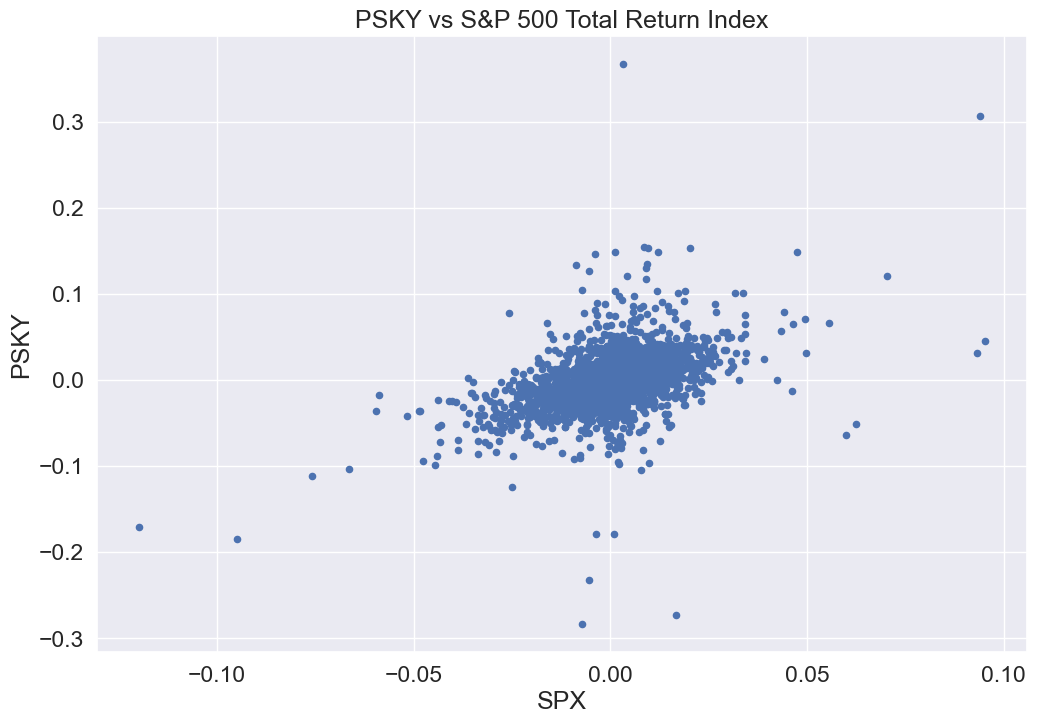

In [19]:
ret.plot(x='SPX', y='PSKY', kind='scatter', title='PSKY vs S&P 500 Total Return Index', figsize=(12,8))

In [22]:
# Ordinary least squares (OLS) regression model
model = ols('PSKY ~ SPX', data=ret)

In [23]:
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   PSKY   R-squared:                       0.224
Model:                            OLS   Adj. R-squared:                  0.224
Method:                 Least Squares   F-statistic:                     1159.
Date:                Thu, 01 Jan 2026   Prob (F-statistic):          1.73e-223
Time:                        12:12:47   Log-Likelihood:                 9308.5
No. Observations:                4022   AIC:                        -1.861e+04
Df Residuals:                    4020   BIC:                        -1.860e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0003      0.000     -0.689      0.4

p-value of 0: Reject the null-hypothesis that the slope coefficient = 0 <br>
The returns of the SNP500 stocks explains the returns of PSKY stocks with statistical significance